In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv

In [4]:
# load the new file
df = read_csv('./data/bitcoin_data.csv', date_parser = True)
df.drop(df.columns[0], axis=1,inplace = True)
len(df)

20156

In [5]:
df = df[df['NewDateTime']>= '2020-01-01'].copy()
len(df)

20156

In [6]:
# df.drop(df.head(len(df)%168).index,inplace=True)
# len(df)

In [7]:
viewdata = 168*3
viewdata

504

In [8]:
df = df.drop_duplicates(subset=['NewDateTime'], keep="last")
data_training = df.iloc[0:int(len(df)-viewdata),:]
data_test = df.iloc[int(len(df)-viewdata):int(len(df)),:]

data_training

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
0,8431.82,8145.28,8455.00,8142.00,11041.87000,2020-01-08 00:00:00,1.035179,0.034574,1.011291,0.01,89
1,8370.92,8431.82,8448.14,8328.89,7355.82000,2020-01-08 01:00:00,0.992777,-0.007249,1.011291,0.01,86
2,8278.59,8370.92,8422.00,8256.74,4048.91000,2020-01-08 02:00:00,0.988970,-0.011091,1.011291,0.01,75
3,8300.34,8278.59,8344.00,8244.93,3947.38000,2020-01-08 03:00:00,1.002627,0.002624,1.011291,0.01,68
4,8344.63,8300.34,8355.87,8288.00,2374.55000,2020-01-08 04:00:00,1.005336,0.005322,1.011291,0.01,68
...,...,...,...,...,...,...,...,...,...,...,...
19620,48674.90,47830.00,49259.98,47212.00,10878.12140,2021-12-15 19:00:00,1.017665,0.017511,1.000075,0.01,47
19621,49211.84,48674.90,49500.00,48527.01,4690.61661,2021-12-15 20:00:00,1.011031,0.010971,1.000075,0.01,47
19622,49168.89,49211.83,49358.75,48865.94,2276.03432,2021-12-15 21:00:00,0.999127,-0.000873,1.000075,0.01,45
19623,48747.30,49168.89,49235.38,48653.00,1159.59720,2021-12-15 22:00:00,0.991426,-0.008611,1.000075,0.01,41


In [9]:
training_data = data_training.drop(['NewDateTime'], axis = 1)


training_data

,close,open,high,low,Volume BTC,returns,log_returns,SOPR,fundingRate,googleTrend
0,8431.82,8145.28,8455.00,8142.00,11041.87000,1.035179,0.034574,1.011291,0.01,89
1,8370.92,8431.82,8448.14,8328.89,7355.82000,0.992777,-0.007249,1.011291,0.01,86
2,8278.59,8370.92,8422.00,8256.74,4048.91000,0.988970,-0.011091,1.011291,0.01,75
3,8300.34,8278.59,8344.00,8244.93,3947.38000,1.002627,0.002624,1.011291,0.01,68
4,8344.63,8300.34,8355.87,8288.00,2374.55000,1.005336,0.005322,1.011291,0.01,68
...,...,...,...,...,...,...,...,...,...,...
19620,48674.90,47830.00,49259.98,47212.00,10878.12140,1.017665,0.017511,1.000075,0.01,47
19621,49211.84,48674.90,49500.00,48527.01,4690.61661,1.011031,0.010971,1.000075,0.01,47
19622,49168.89,49211.83,49358.75,48865.94,2276.03432,0.999127,-0.000873,1.000075,0.01,45
19623,48747.30,49168.89,49235.38,48653.00,1159.59720,0.991426,-0.008611,1.000075,0.01,41


In [10]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.06668181, 0.06223816, 0.05971424, ..., 0.61500702, 0.51666667,
        0.88297872],
       [0.06573767, 0.06668033, 0.0596077 , ..., 0.61500702, 0.51666667,
        0.85106383],
       [0.06430626, 0.06573621, 0.05920174, ..., 0.61500702, 0.51666667,
        0.73404255],
       ...,
       [0.69823442, 0.69888464, 0.69496428, ..., 0.54767841, 0.51666667,
        0.41489362],
       [0.69169845, 0.69821895, 0.6930483 , ..., 0.54767841, 0.51666667,
        0.37234043],
       [0.69352286, 0.69168328, 0.68899037, ..., 0.54767841, 0.51666667,
        0.35106383]])

In [11]:
X_train = []
Y_train = []

In [12]:
training_data.shape

(16974, 10)

In [13]:
for i in range(168, training_data.shape[0],8):
    X_train.append(training_data[i-168:i])
    Y_train.append(training_data[i])

In [14]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [15]:
X_train.shape

(2101, 168, 10)

In [16]:
Y_train.shape

(2101, 10)

In [17]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,RepeatVector,TimeDistributed

In [47]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 10)))
model.add(Dropout(0.15))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(units =10))

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 168, 50)           12200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 168, 50)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 168, 60)           26640     
_________________________________________________________________
dropout_13 (Dropout)         (None, 168, 60)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 168, 80)           45120     
_________________________________________________________________
dropout_14 (Dropout)         (None, 168, 80)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 120)              

In [49]:
model.compile(loss='mse', optimizer='adam')

In [50]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.1)

Train on 1890 samples, validate on 211 samples
Epoch 1/10
1890/1890 [==============================] - 83s 44ms/sample - loss: 0.1567 - val_loss: 0.1018
Epoch 2/10
1890/1890 [==============================] - 80s 42ms/sample - loss: 0.0397 - val_loss: 746.4117
Epoch 3/10
1890/1890 [==============================] - 81s 43ms/sample - loss: 0.0176 - val_loss: 0.0116
Epoch 4/10
1890/1890 [==============================] - 80s 42ms/sample - loss: 0.0132 - val_loss: 0.0073
Epoch 5/10
1890/1890 [==============================] - 80s 42ms/sample - loss: 0.0122 - val_loss: 0.0058
Epoch 6/10
1890/1890 [==============================] - 80s 42ms/sample - loss: 0.0110 - val_loss: 0.0048
Epoch 7/10
1890/1890 [==============================] - 80s 42ms/sample - loss: 0.0104 - val_loss: 0.0071
Epoch 8/10
1890/1890 [==============================] - 79s 42ms/sample - loss: 0.0098 - val_loss: 0.0041
Epoch 9/10
1890/1890 [==============================] - 90s 48ms/sample - loss: 0.0094 - val_loss: 0.00

In [17]:
import tensorflow as tf
model = tf.keras.models.load_model('168_1_f.h5')

In [30]:
model.save("168_1_f.h5")

In [31]:
# result = model.predict(X_train, batch_size=128, verbose=0)
# for value in result[0,:,0]:
# 	print('%.1f' % value)

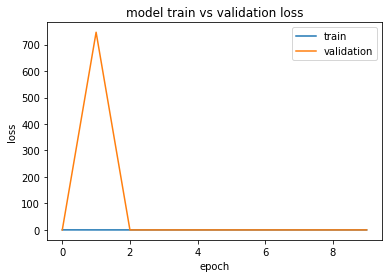

In [51]:
loss = history.history['loss']
epoch = range(len(loss))
# plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [52]:
past_weeks = data_training.tail(168)
df= past_weeks.append(data_test, ignore_index = True)
# test.drop(test.tail(len(test)%168).index,inplace=True)
# test = test.drop(['NewDateTime'], axis=1)
df

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
0,50399.83,50471.19,50797.76,50323.83,1165.14158,2021-12-09 00:00:00,0.998586,-0.001415,0.996332,0.01,19
1,50182.70,50399.84,50483.68,50147.89,871.61111,2021-12-09 01:00:00,0.995692,-0.004317,0.996332,0.01,19
2,49886.02,50182.71,50276.81,49620.62,1628.84987,2021-12-09 02:00:00,0.994088,-0.005930,0.996332,0.01,21
3,49513.35,49886.02,49934.12,49425.74,951.66432,2021-12-09 03:00:00,0.992530,-0.007498,0.996332,0.01,22
4,49816.07,49517.00,49821.01,49420.33,1052.17101,2021-12-09 04:00:00,1.006114,0.006095,0.996332,0.01,22
...,...,...,...,...,...,...,...,...,...,...,...
667,44685.93,45919.93,46118.85,44500.00,7383.66525,2022-01-05 19:00:00,0.973127,-0.027240,0.999064,0.01,49
668,43967.01,44685.93,44847.99,43722.54,8054.81116,2022-01-05 20:00:00,0.983912,-0.016219,0.999064,0.01,69
669,43606.37,43967.01,44331.42,43422.54,3844.19955,2022-01-05 21:00:00,0.991797,-0.008236,0.999064,0.01,71
670,43437.05,43602.49,43815.20,42500.00,6856.64070,2022-01-05 22:00:00,0.996117,-0.003890,0.999064,0.01,81


In [53]:
df = df.drop(['NewDateTime'], axis = 1)
len(df)

672

In [54]:
inputs = scaler.transform(df)
inputs.shape

(672, 10)

In [55]:
df2 =df['close'].copy()
pScaler = MinMaxScaler()
pData = pScaler.fit_transform(df2.values.reshape(-1, 1))
pData.shape

(672, 1)

In [56]:
X_test = []
Y_test = []
P_test = []
for i in range(336, inputs.shape[0]+1,168):
    X_test.append(inputs[i-336:i-168])
    Y_test.append(inputs[i-168:i,0])
for i in range(inputs.shape[0], inputs.shape[0]+1,168):
    P_test.append(inputs[i-168:i])

In [57]:
X_test, Y_test,P_test = np.array(X_test), np.array(Y_test), np.array(P_test)
X_test.shape, Y_test.shape, P_test.shape

((3, 168, 10), (3, 168), (1, 168, 10))

In [58]:
X_test[2,167,0] == Y_test[1,167]

True

In [59]:
Y_test[2,167]==P_test[0,167,0]

True

In [60]:
data = (X_test[0,:,:]).reshape(1,168,10)
print(data)
predata = model.predict(data).reshape(1,1,10)
print(predata)
data = data[0,1:168,:].reshape(1,167,10)
data = np.append(data, predata)
data = data.reshape(1,168,10)
data

[[[0.71731786 0.71840824 0.71731263 ... 0.52520262 0.51666667 0.13829787]
  [0.71395167 0.71730212 0.71243485 ... 0.52520262 0.51666667 0.13829787]
  [0.70935219 0.71393599 0.70922208 ... 0.52520262 0.51666667 0.15957447]
  ...
  [0.69823442 0.69888464 0.69496428 ... 0.54767841 0.51666667 0.41489362]
  [0.69169845 0.69821895 0.6930483  ... 0.54767841 0.51666667 0.37234043]
  [0.69352286 0.69168328 0.68899037 ... 0.54767841 0.51666667 0.35106383]]]
[[[0.6940673  0.693362   0.6952762  0.6887065  0.06894332 0.6311731
   0.6706856  0.5757192  0.5450308  0.56053853]]]


array([[[0.71395167, 0.71730212, 0.71243485, ..., 0.52520262,
         0.51666667, 0.13829787],
        [0.70935219, 0.71393599, 0.70922208, ..., 0.52520262,
         0.51666667, 0.15957447],
        [0.70357464, 0.70933647, 0.70389998, ..., 0.52520262,
         0.51666667, 0.17021277],
        ...,
        [0.69169845, 0.69821895, 0.6930483 , ..., 0.54767841,
         0.51666667, 0.37234043],
        [0.69352286, 0.69168328, 0.68899037, ..., 0.54767841,
         0.51666667, 0.35106383],
        [0.6940673 , 0.693362  , 0.6952762 , ..., 0.57571918,
         0.54503077, 0.56053853]]])

In [61]:
pred = []
for j in range(0,3):
    
    data = (X_test[j,:,:]).reshape(1,168,10)
    for i in range(0,168):
        predata = model.predict(data).reshape(1,1,10)
        data = data[0,1:168,:].reshape(1,167,10)
        data = np.append(data, predata)
        data = data.reshape(1,168,10)
        predata=pScaler.inverse_transform(predata.reshape(-1, 1))
        pred.append((predata[0]))


In [62]:
real=pScaler.inverse_transform(Y_test)
real= real.reshape(-1, 1)

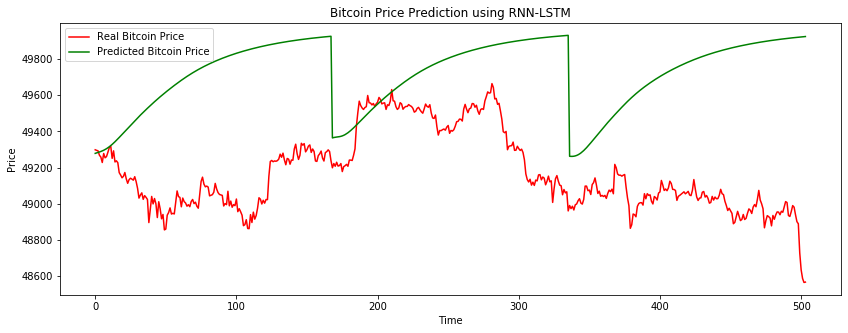

In [63]:
plt.figure(figsize=(14,5))
plt.plot(np.array(real[:,0]).flat, color = 'red', label = 'Real Bitcoin Price')
plt.plot(np.array(pred).flat, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [84]:
from scipy.signal import savgol_filter
realData = savgol_filter(real[:,0], 53, 3)
predictData = np.array(pred)[:,0]
predictData.shape

(504,)

-0.0778


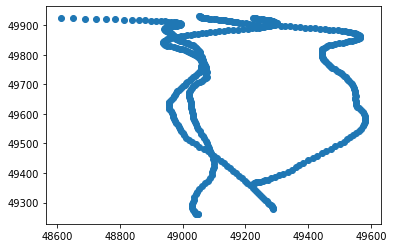

In [85]:
r_d_s = pd.Series(realData)
p_d_s = pd.Series(predictData)

corr_bitcoin = round(r_d_s.corr(p_d_s),4)

print(corr_bitcoin)

plt.scatter(realData,predictData)
plt.show()

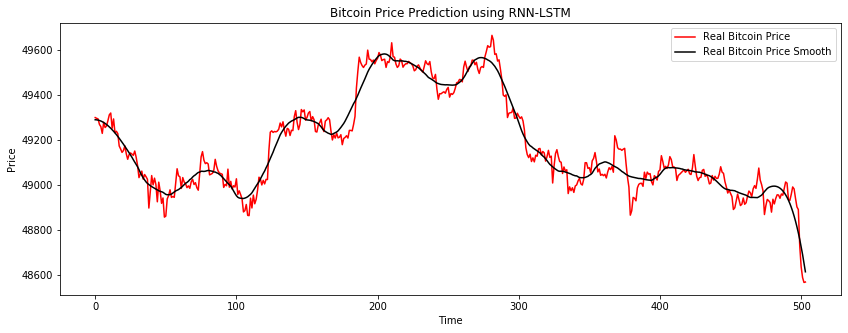

In [79]:
from scipy.signal import savgol_filter

tdata = np.array(real[:,0])



plt.figure(figsize=(14,5))
plt.plot(tdata, color = 'red', label = 'Real Bitcoin Price')
plt.plot(savgol_filter(tdata, 53, 3), color = 'black', label = 'Real Bitcoin Price Smooth')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()